# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['muroto',
 'ushuaia',
 'kahului',
 'kaliua',
 'avarua',
 'provideniya',
 'mastung',
 'victoria',
 'dogondoutchi',
 'katsuura',
 'uray',
 'punta arenas',
 'east london',
 'bolivar',
 'ritchie',
 'rikitea',
 'khatanga',
 'gizo',
 'hithadhoo',
 'stephenville',
 'coquimbo',
 'port elizabeth',
 'olinda',
 'rantepao',
 'longyearbyen',
 'biak',
 'bengkulu',
 'mataura',
 'barrow',
 'tiksi',
 'bluff',
 'atuona',
 'ostrovnoy',
 'carnarvon',
 'povenets',
 'mar del plata',
 'hermanus',
 'saint-philippe',
 'alekseyevsk',
 'sataua',
 'hobart',
 'kapaa',
 'yellowknife',
 'kiruna',
 'arcachon',
 'luderitz',
 'kavaratti',
 'dolbeau',
 'severo-kurilsk',
 'viedma',
 'eldorado',
 'bredasdorp',
 'lebu',
 'pidhorodne',
 'husavik',
 'marzuq',
 'dikson',
 'jacksonville beach',
 'fort nelson',
 'buta',
 'asau',
 'khandyga',
 'kampot',
 'cape town',
 'bargal',
 'hasaki',
 'karkal',
 'sungairaya',
 'esperance',
 'cartagena del chaira',
 'batagay-alyta',
 'rock sound',
 'sao joao da barra',
 'belyy yar',
 'misra

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
#Build partial url to fetch weather information for cities in the list
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
citylist = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
dte = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")
for city in cities:
    try:
   
        response = requests.get(query_url + city).json()
        print("Processing data for " + city + " :")
        print(json.dumps(response, indent=4, sort_keys=True))
        print("latitude: "+ str(response['coord']['lat']))
        print("longitude : " + str(response['coord']['lon'] ))
        print("maxtemp : " + str(response['main']['temp_max']))
        print("humidity : " + str(response['main']['humidity']))
        print("cloudiness : " + str(response['clouds']['all']))
        print("windspeed : " + str(response['wind']['speed']))
        print("country : "+ str(response['sys']['country']))
        print("date : "+ str(response['dt']))
        citylist.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dte.append(response['dt'])
    except:
        print(city + "not found")
        maxlength = len(citylist)
        if maxlength > 0:
            if(len(lat)) == maxlength:
                lat.pop()
            if(len(lng)) == maxlength :
                lng.pop()
            if(len(maxtemp)) == maxlength:
                maxtemp.pop()
            if(len(humidity)) == maxlength:
                humidity.pop()
            if(len(cloudiness)) == maxlength:
                cloudiness.pop()
            if(len(windspeed)) == maxlength:
                windspeed.pop()
            if(len(country)) == maxlength:
                country.pop()
            if(len(dte)) == maxlength:
                dte.pop()
            citylist.pop()
        
print(lat)
print(lng)
print(maxtemp)
print(humidity)
print(cloudiness)
print(windspeed)
print(country)
print(dte)
        
 




Beginning Data Retrieval
Processing data for muroto :
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 33.28,
        "lon": 134.15
    },
    "dt": 1603484860,
    "id": 1856392,
    "main": {
        "feels_like": 57.81,
        "grnd_level": 1011,
        "humidity": 61,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 62.17,
        "temp_max": 62.17,
        "temp_min": 62.17
    },
    "name": "Muroto-misakicho",
    "sys": {
        "country": "JP",
        "sunrise": 1603487690,
        "sunset": 1603527605
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 357,
        "speed": 7.2
    }
}
latitude: 33.28
longitude : 134.15
maxtemp : 62.17
humidity : 61
cloudiness : 2
windspeed : 7.2
country : JP
date : 

Processing data for uray :
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 60.12,
        "lon": 64.78
    },
    "dt": 1603485125,
    "id": 1488429,
    "main": {
        "feels_like": 12.87,
        "grnd_level": 1009,
        "humidity": 96,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 20.34,
        "temp_max": 20.34,
        "temp_min": 20.34
    },
    "name": "Uray",
    "sys": {
        "country": "RU",
        "sunrise": 1603507397,
        "sunset": 1603541192
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 248,
        "speed": 4.27
    }
}
latitude: 60.12
longitude : 64.78
maxtemp : 20.34
humidity : 96
cloudiness : 0
windspeed : 4.27
country : RU
date : 1603485125
Processing data for punta ar

Processing data for stephenville :
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.22,
        "lon": -98.2
    },
    "dt": 1603485126,
    "id": 4734350,
    "main": {
        "feels_like": 36.66,
        "humidity": 81,
        "pressure": 1023,
        "temp": 48.07,
        "temp_max": 48.2,
        "temp_min": 48
    },
    "name": "Stephenville",
    "sys": {
        "country": "US",
        "id": 5806,
        "sunrise": 1603456964,
        "sunset": 1603497063,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "gust": 27.51,
        "speed": 17.22
    }
}
latitude: 32.22
longitude : -98.2
maxtemp : 48.2
humidity : 81
cloudiness : 90
windspeed : 17.22
country : US
date : 160348512

Processing data for tiksi :
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 71.69,
        "lon": 128.87
    },
    "dt": 1603484898,
    "id": 2015306,
    "main": {
        "feels_like": 10.9,
        "grnd_level": 995,
        "humidity": 95,
        "pressure": 999,
        "sea_level": 999,
        "temp": 22.21,
        "temp_max": 22.21,
        "temp_min": 22.21
    },
    "name": "Tiksi",
    "sys": {
        "country": "RU",
        "sunrise": 1603495879,
        "sunset": 1603521950
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 151,
        "speed": 11.36
    }
}
latitude: 71.69
longitude : 128.87
maxtemp : 22.21
humidity : 95
cloudiness : 100
windspeed : 11.36
country : RU
date : 1603484898
Processing data

Processing data for hobart :
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -42.88,
        "lon": 147.33
    },
    "dt": 1603484919,
    "id": 2163355,
    "main": {
        "feels_like": 49.12,
        "humidity": 93,
        "pressure": 1002,
        "temp": 51.71,
        "temp_max": 53.01,
        "temp_min": 51.01
    },
    "name": "Hobart",
    "rain": {
        "1h": 0.39
    },
    "sys": {
        "country": "AU",
        "id": 9545,
        "sunrise": 1603479924,
        "sunset": 1603529045,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 264,
        "speed": 4.63
    }
}
latitude: -42.88
longitude : 147.33
maxtemp : 53.01
humidity : 93
cloudiness : 75
windspeed : 4.63
country : AU
date : 16034

Processing data for eldorado :
{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": -23.79,
        "lon": -54.28
    },
    "dt": 1603485128,
    "id": 3464343,
    "main": {
        "feels_like": 85.12,
        "grnd_level": 970,
        "humidity": 40,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 86,
        "temp_max": 86,
        "temp_min": 86
    },
    "name": "Eldorado",
    "rain": {
        "1h": 0.56
    },
    "sys": {
        "country": "BR",
        "sunrise": 1603443403,
        "sunset": 1603489545
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 123,
        "speed": 6.62
    }
}
latitude: -23.79
longitude : -54.28
maxtemp : 86
humidity : 40
cloudiness : 9
windspeed : 6.62
country : BR
date :

Processing data for khandyga :
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 62.67,
        "lon": 135.6
    },
    "dt": 1603485129,
    "id": 2022773,
    "main": {
        "feels_like": 3.67,
        "grnd_level": 1005,
        "humidity": 92,
        "pressure": 1025,
        "sea_level": 1025,
        "temp": 10.4,
        "temp_max": 10.4,
        "temp_min": 10.4
    },
    "name": "Khandyga",
    "sys": {
        "country": "RU",
        "sunrise": 1603490929,
        "sunset": 1603523670
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 118,
        "speed": 1.52
    }
}
latitude: 62.67
longitude : 135.6
maxtemp : 10.4
humidity : 92
cloudiness : 75
windspeed : 1.52
country : RU
date : 1603485129
Processing data fo

Processing data for belyy yar :
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 53.6,
        "lon": 91.39
    },
    "dt": 1603485130,
    "id": 1510377,
    "main": {
        "feels_like": 22.32,
        "humidity": 92,
        "pressure": 1018,
        "temp": 30.2,
        "temp_max": 30.2,
        "temp_min": 30.2
    },
    "name": "Belyy Yar",
    "sys": {
        "country": "RU",
        "id": 8942,
        "sunrise": 1603499910,
        "sunset": 1603535907,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 6.71
    }
}
latitude: 53.6
longitude : 91.39
maxtemp : 30.2
humidity : 92
cloudiness : 0
windspeed : 6.71
country : RU
date : 1603485130
Processing data for misratah :
{
    "ba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
citylist

['muroto',
 'ushuaia',
 'kahului',
 'kaliua',
 'avarua',
 'provideniya',
 'mastung',
 'victoria',
 'dogondoutchi',
 'katsuura',
 'uray',
 'punta arenas',
 'east london',
 'bolivar',
 'ritchie',
 'rikitea',
 'khatanga',
 'gizo',
 'hithadhoo',
 'stephenville',
 'coquimbo',
 'port elizabeth',
 'olinda',
 'rantepao',
 'longyearbyen',
 'biak',
 'bengkulu',
 'mataura',
 'barrow',
 'tiksi',
 'bluff',
 'atuona',
 'ostrovnoy',
 'carnarvon',
 'povenets',
 'mar del plata',
 'hermanus',
 'saint-philippe',
 'hobart',
 'kapaa',
 'yellowknife',
 'kiruna',
 'arcachon',
 'luderitz',
 'severo-kurilsk',
 'viedma',
 'eldorado',
 'bredasdorp',
 'lebu',
 'pidhorodne',
 'husavik',
 'marzuq',
 'dikson',
 'jacksonville beach',
 'fort nelson',
 'buta',
 'asau',
 'khandyga',
 'kampot',
 'hasaki',
 'karkal',
 'sungairaya',
 'esperance',
 'cartagena del chaira',
 'batagay-alyta',
 'rock sound',
 'sao joao da barra',
 'belyy yar',
 'misratah',
 'pevek',
 'new norfolk',
 'puerto ayora',
 'boguchany',
 'weligama',
 '

In [16]:

city_df = pd.DataFrame({"City": citylist,
                       "Lat" : lat,
                       "Lng": lng,
                       "Max Temp": maxtemp,
                       "Humidity" : humidity,
                       "Cloudiness" : cloudiness,
                        "Wind Speed" : windspeed,
                       "Country" : country,
                       "Date" : dte})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muroto,33.28,134.15,62.17,61,2,7.20,JP,1603484860
1,ushuaia,-54.80,-68.30,46.40,65,40,16.11,AR,1603485124
2,kahului,20.89,-156.47,87.80,48,40,6.93,US,1603485124
3,kaliua,-5.06,31.79,76.24,44,22,4.45,TZ,1603485124
4,avarua,-21.21,-159.78,78.80,65,67,10.29,CK,1603485124
...,...,...,...,...,...,...,...,...,...
71,puerto ayora,-0.74,-90.35,78.80,74,20,11.41,EC,1603485125
72,boguchany,58.38,97.45,34.47,88,100,7.99,RU,1603485128
73,weligama,5.97,80.42,77.65,89,1,8.32,LK,1603485131
74,pemba,-12.97,40.52,77.00,83,75,8.05,MZ,1603485131


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
max_humidity_city = city_df.loc[city_df["Humidity"] > 100,"City"]
max_humidity_city

Series([], Name: City, dtype: object)

In [18]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

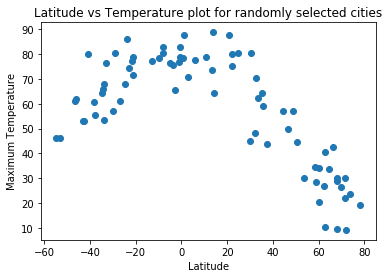

In [20]:
lat_data = city_df["Lat"]
temp_data = city_df["Max Temp"]
plt.scatter(lat_data,temp_data)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs Temperature plot for randomly selected cities")
plt.show()

## Latitude vs. Humidity Plot

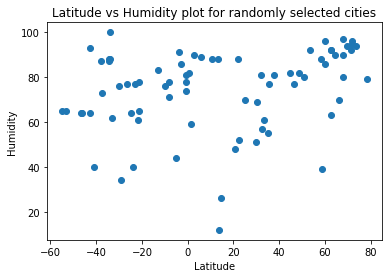

In [21]:
hum_data = city_df["Humidity"]
plt.scatter(lat_data,hum_data)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity plot for randomly selected cities")
plt.show()


## Latitude vs. Cloudiness Plot

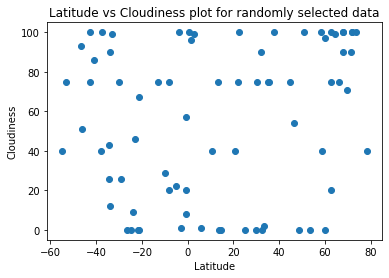

In [22]:
cloud_data = city_df["Cloudiness"]
plt.scatter(lat_data,cloud_data)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness plot for randomly selected data")
plt.show()

## Latitude vs. Wind Speed Plot

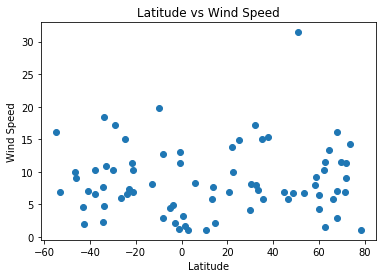

In [23]:
wind_data = city_df["Wind Speed"]
plt.scatter(lat_data,wind_data)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression